In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<a id='import'></a>
# Importing libraries and data

In [ ]:
# import pandas
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt


## Importing the data
The next block of code imports the data.

*Note: It will take a longer time due to very large size*

In [ ]:
# Changing the datat types to a smaller size data type to improve the processing
# Changing the data types as mentioned below
dtypes = {
    "Transaction_unique_identifier": "category",
    "Price": "int32",
    "Postcode": "object",
    "Property_Type": "category",
    "Old_New": "category",
    "Duration": "category",
    'PAON': "object", 'SAON': "object", 'Street': "object", 'Locality': "object",
    "Town_City": "category",
    "District": "category",
    "County": "category",
    "PPD_Category_Type": "category",
    "Record_Status_monthly_file": "category"
}

In [ ]:
# New column names that are to be placed in the header of our data frame
col = ['Transaction_unique_identifier', 'Price', 'Date_of_Transfer', 'Postcode', 'Property_Type', 'Old_New', 
       'Duration', 'PAON', 'SAON', 'Street', 'Locality', 'Town_City', 'District', 'County', 'PPD_Category_Type', 
       'Record_Status_monthly_file']

# import the data
path = '/content/drive/MyDrive/pp-complete.csv'
house_data = pd.read_csv(path, names=col, dtype = dtypes)

# display the top 5 rows of our data set
house_data

,Transaction_unique_identifier,Price,Date_of_Transfer,Postcode,Property_Type,Old_New,Duration,PAON,SAON,Street,Locality,Town_City,District,County,PPD_Category_Type,Record_Status_monthly_file
0,{A42E2F04-2538-4A25-94C5-49E29C6C8FA8},18500,1995-01-31 00:00,TQ1 1RY,F,N,L,VILLA PARADISO,FLAT 10,HIGHER WARBERRY ROAD,TORQUAY,TORQUAY,TORBAY,TORBAY,A,A
1,{1BA349E3-2579-40D6-999E-49E2A25D2284},73450,1995-10-09 00:00,L26 7XJ,D,Y,F,6,NaN,CATKIN ROAD,LIVERPOOL,LIVERPOOL,KNOWSLEY,MERSEYSIDE,A,A
2,{E5B50DCB-BC7A-4E54-B167-49E2A6B4148B},59000,1995-03-31 00:00,BH12 2AE,D,N,F,28,NaN,ALDER ROAD,POOLE,POOLE,POOLE,POOLE,A,A
3,{81E50116-D675-4B7F-9F8D-49E2B5D43271},31000,1995-12-04 00:00,IP13 0DR,D,Y,F,NONSUCH COTTAGE,NaN,THE STREET,HACHESTON,WOODBRIDGE,SUFFOLK COASTAL,SUFFOLK,A,A
4,{B97455B9-75CB-40BB-A615-42C53683E143},95000,1995-09-22 00:00,WS14 0BE,D,N,F,FOX COVER COTTAGE,NaN,HALL LANE,LICHFIELD,LICHFIELD,LICHFIELD,STAFFORDSHIRE,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26657352,{CD5A9DCC-9B14-310A-E053-6C04A8C00A1F},51500,2021-08-04 00:00,N19 4EH,O,N,F,60,FLAT 2-7,GRENVILLE ROAD,NaN,LONDON,ISLINGTON,GREATER LONDON,B,A
26657353,{CD5A9DCC-9B16-310A-E053-6C04A8C00A1F},230000,2021-05-20 00:00,SS1 1BW,O,N,F,37,NaN,ALEXANDRA STREET,NaN,SOUTHEND-ON-SEA,SOUTHEND-ON-SEA,SOUTHEND-ON-SEA,B,A
26657354,{CD5A9DCC-9B1C-310A-E053-6C04A8C00A1F},205000,2021-04-30 00:00,CM1 3GW,F,N,L,171,NaN,PARKINSON DRIVE,NaN,CHELMSFORD,CHELMSFORD,ESSEX,B,A
26657355,{CD5A9DCC-9B1E-310A-E053-6C04A8C00A1F},185000,2021-01-18 00:00,CO7 0FX,F,N,L,THE SHIPYARD,FLAT 2,WATERSIDE,BRIGHTLINGSEA,COLCHESTER,TENDRING,ESSEX,B,A


In [ ]:
main_df = house_data

In [ ]:
# display the info for the data set
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26657357 entries, 0 to 26657356
Data columns (total 16 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   Transaction_unique_identifier  category
 1   Price                          int32   
 2   Date_of_Transfer               object  
 3   Postcode                       object  
 4   Property_Type                  category
 5   Old_New                        category
 6   Duration                       category
 7   PAON                           object  
 8   SAON                           object  
 9   Street                         object  
 10  Locality                       object  
 11  Town_City                      category
 12  District                       category
 13  County                         category
 14  PPD_Category_Type              category
 15  Record_Status_monthly_file     category
dtypes: category(9), int32(1), object(6)
memory usage: 3.1+ GB


In [ ]:
house_data['County'].value_counts()['BRIGHTON AND HOVE']

757623

In [ ]:
d_lan = house_data[house_data['County'] == 'BRIGHTON AND HOVE']

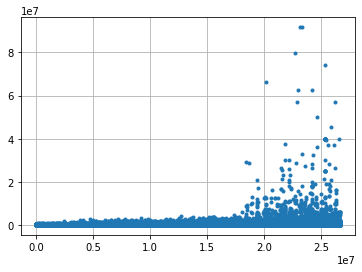

In [ ]:
plt.plot(d_lan.Price, '.')
plt.grid()

In [ ]:
# Checking the shape of the data
house_data.shape

(26657357, 16)

# Pre-processing the data 


In [ ]:
# Changing the data type of "Date_of_Transfer" to datetime data type
house_data["Date_of_Transfer"] = pd.to_datetime(house_data["Date_of_Transfer"])


## Adding a feature `Year`, `Month`, `Date` extracted from the date column
The `Date of Transfer` feature gives the date of sale in the yyyy-mmm-dd hh:mm format.

In [ ]:
# create a new column Year from the Date of Transfer feature
house_data['Year'] = house_data['Date_of_Transfer'].dt.year

# create a new column Month from the Date of Transfer feature
house_data['Month'] = house_data['Date_of_Transfer'].dt.month

# create a new column Day from the Date of Transfer feature
house_data['Day'] = house_data['Date_of_Transfer'].dt.day

# displaying the first 5 rows of data 
house_data.head()

,Transaction_unique_identifier,Price,Date_of_Transfer,Postcode,Property_Type,Old_New,Duration,PAON,SAON,Street,Locality,Town_City,District,County,PPD_Category_Type,Record_Status_monthly_file,Year,Month,Day
0,{A42E2F04-2538-4A25-94C5-49E29C6C8FA8},18500,1995-01-31,TQ1 1RY,F,N,L,VILLA PARADISO,FLAT 10,HIGHER WARBERRY ROAD,TORQUAY,TORQUAY,TORBAY,TORBAY,A,A,1995,1,31
1,{1BA349E3-2579-40D6-999E-49E2A25D2284},73450,1995-10-09,L26 7XJ,D,Y,F,6,NaN,CATKIN ROAD,LIVERPOOL,LIVERPOOL,KNOWSLEY,MERSEYSIDE,A,A,1995,10,9
2,{E5B50DCB-BC7A-4E54-B167-49E2A6B4148B},59000,1995-03-31,BH12 2AE,D,N,F,28,NaN,ALDER ROAD,POOLE,POOLE,POOLE,POOLE,A,A,1995,3,31
3,{81E50116-D675-4B7F-9F8D-49E2B5D43271},31000,1995-12-04,IP13 0DR,D,Y,F,NONSUCH COTTAGE,NaN,THE STREET,HACHESTON,WOODBRIDGE,SUFFOLK COASTAL,SUFFOLK,A,A,1995,12,4
4,{B97455B9-75CB-40BB-A615-42C53683E143},95000,1995-09-22,WS14 0BE,D,N,F,FOX COVER COTTAGE,NaN,HALL LANE,LICHFIELD,LICHFIELD,LICHFIELD,STAFFORDSHIRE,A,A,1995,9,22


In [ ]:
# Checking the number of NULL values
house_data.isna().sum()

Transaction_unique_identifier           0
Price                                   0
Date_of_Transfer                        0
Postcode                            42869
Property_Type                           0
Old_New                                 0
Duration                                0
PAON                                 4194
SAON                             23547147
Street                             418533
Locality                          9076228
Town_City                               0
District                                0
County                                  0
PPD_Category_Type                       0
Record_Status_monthly_file              0
Year                                    0
Month                                   0
Day                                     0
dtype: int64

In [ ]:
# The following conditional data has been drawn out for future steps
U_PT_Bristol_data = house_data[(house_data.Duration == 'U') & (house_data.Town_City == 'BRISTOL') & (house_data.District == 'CITY OF BRISTOL')]
U_PT_Leeds_data = house_data[(house_data.Duration == 'U') & (house_data.District == 'LEEDS')]

## Prices Interval Investigation

Text(0, 0.5, 'Prices')

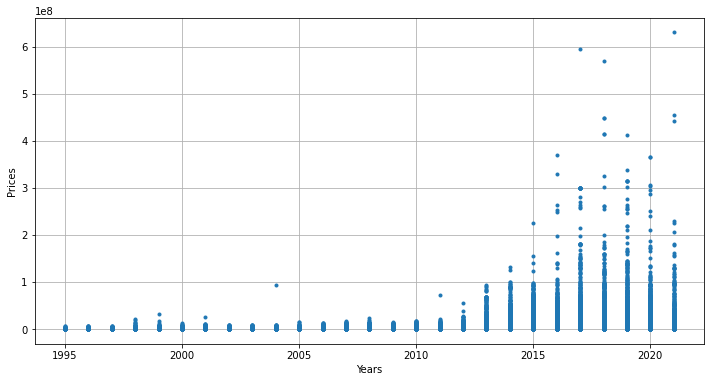

In [ ]:
# Plotting the Prices across all the years
plt.figure(figsize = (12, 6))
plt.plot(house_data.Year, house_data.Price, '.')
plt.grid()
plt.xlabel('Years')
plt.ylabel('Prices')

In [ ]:
# Case-1: Prices > 600000000
house_data[house_data.Price> 600000000] 

,Transaction_unique_identifier,Price,Date_of_Transfer,Postcode,Property_Type,Old_New,Duration,PAON,SAON,Street,Locality,Town_City,District,County,PPD_Category_Type,Record_Status_monthly_file,Year,Month,Day
26537494,{C6209F60-4924-295E-E053-6C04A8C0DDCC},630000000,2021-03-29,CR7 6AZ,O,N,F,641,NaN,LONDON ROAD,NaN,THORNTON HEATH,CROYDON,GREATER LONDON,B,A,2021,3,29


In [ ]:
yp = house_data.groupby(by = ['Year'], as_index=False)['Postcode'].count()
yp.columns = ['Year', 'Count']
yp.head()

,Year,Count
0,1995,796184
1,1996,964285
2,1997,1093277
3,1998,1049378
4,1999,1193710


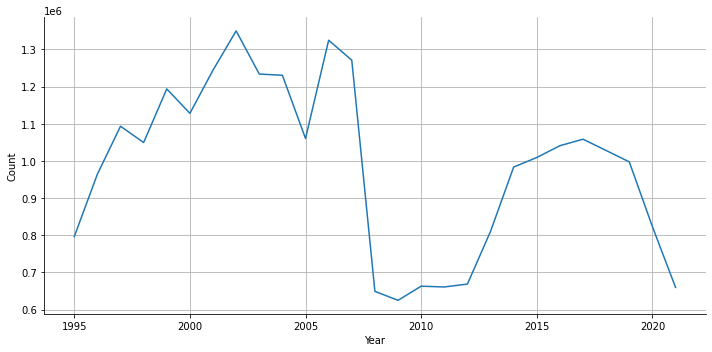

In [ ]:
# plot lines showing the change in years over different property types

sns.relplot(kind='line', data=yp, x='Year', y='Count', aspect=2);
plt.grid()

The feature `SAON` has `23547147` NULL values which is a huge number so we are removing this feature.

Also, `Locality` feature has `9076228` NULL values which contributes to 34% of the total data and hence we are removing it. ALso, since it contains a value that can not be filled via mean or median so we'll remove it.

Without Locality, `Street` won't be of any significance as many localities could have same name SAON so removing this feature also.

In [ ]:
house_data.drop(['SAON' , 'Locality', 'Street'], axis=1, inplace=True)

# Removing rest of the null values
house_data.dropna(inplace=True)

# Checking the number of NULL values again in the complete data
house_data.isna().sum()

Transaction_unique_identifier    0
Price                            0
Date_of_Transfer                 0
Postcode                         0
Property_Type                    0
Old_New                          0
Duration                         0
PAON                             0
Town_City                        0
District                         0
County                           0
PPD_Category_Type                0
Record_Status_monthly_file       0
Year                             0
Month                            0
Day                              0
dtype: int64

Also, here we don't see any use of `Transaction_unique_identifier` column, so removing this column too 

In [ ]:
house_data.drop(['Transaction_unique_identifier'], axis=1, inplace=True)

## Checking the variations in `Property_Type` and also it's variations with other features

In [ ]:
y=house_data.groupby(by= ['Property_Type','Year'], as_index = False )['Price'].mean()

In [ ]:
y.head(2)

,Property_Type,Year,Price
0,D,1995,104723.958983
1,D,1996,108381.374969


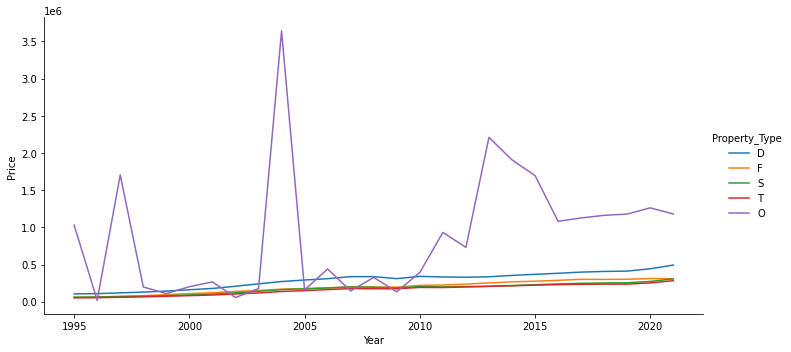

In [ ]:
# plot lines showing the change in years over different property types

sns.relplot(kind='line', data=y, x='Year', y='Price', hue='Property_Type', aspect=2);

In [ ]:
# Checking the counts of different values present under `Property_Type` column
house_data.Property_Type.value_counts()

T    8031091
S    7310270
D    6149624
F    4778461
O     340849
Name: Property_Type, dtype: int64

As can be seen from above that `Property_Type = O` is showing an aberrant behaviour with its price value fluctuating all across and has no particular trend.

Also, it is the least occured type of all the other Property_Type because type='O' means selling of a property consisting two or more plots.

With years there is a slight increment in the average price of types D, F, S and T with property of type `D` having more price as compared to the rest of the three mentioned.

## Checking the variations in `Duration` and also it's variations with other features

In [ ]:
d = house_data.groupby(by= ['Duration','Year'], as_index = False )['Price'].mean()
d.head(2)

,Duration,Year,Price
0,F,1995,70758.335174
1,F,1996,74123.083548


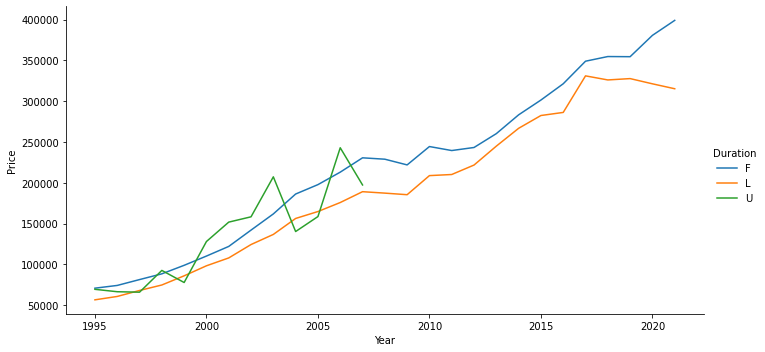

In [ ]:
# plot lines showing the change of Prices in years over different duration

sns.relplot(kind='line', data=d, x='Year', y='Price', hue='Duration', aspect=2);

In [ ]:
# Checking the counts of different values present under `Duration` column
house_data.Duration.value_counts()

F    20358924
L     6250837
U         534
Name: Duration, dtype: int64

## ===========  Important interpretation out of `Duration` feature =========

In [ ]:
# Finding all the properties with Duration == 'U'
house_data[house_data.Duration == 'U'].sort_values(['Date_of_Transfer'], ascending=False)

,Price,Date_of_Transfer,Postcode,Property_Type,Old_New,Duration,PAON,Town_City,District,County,PPD_Category_Type,Record_Status_monthly_file,Year,Month,Day
13918848,145000,2007-05-17,BS7 0AL,F,N,U,66,BRISTOL,CITY OF BRISTOL,CITY OF BRISTOL,A,A,2007,5,17
13866978,278250,2007-03-12,IG11 8PF,T,Y,U,4,BARKING,BARKING AND DAGENHAM,GREATER LONDON,A,A,2007,3,12
14853166,91319,2007-02-16,LS9 8AR,F,Y,U,TIMBLE BECK,LEEDS,LEEDS,WEST YORKSHIRE,A,A,2007,2,16
14197290,174950,2007-02-16,OL9 0BE,D,N,U,26,OLDHAM,OLDHAM,GREATER MANCHESTER,A,A,2007,2,16
13860417,362500,2007-02-09,YO12 5BS,D,N,U,82,SCARBOROUGH,SCARBOROUGH,NORTH YORKSHIRE,A,A,2007,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231915,75000,1995-08-25,SE12 9JB,S,N,U,67,LONDON,LEWISHAM,GREATER LONDON,A,A,1995,8,25
709184,63500,1995-04-28,BH3 7EW,F,N,U,31A,BOURNEMOUTH,BOURNEMOUTH,BOURNEMOUTH,A,A,1995,4,28
482502,26000,1995-02-20,OL8 3DE,T,N,U,300,OLDHAM,OLDHAM,GREATER MANCHESTER,A,A,1995,2,20
499528,42016,1995-01-30,SW4 9NG,F,N,U,40,LONDON,LAMBETH,GREATER LONDON,A,A,1995,1,30


## Considering only `Bristol` data

In [ ]:
# Data of Property_type = 'U' for Bristol
U_PT_Bristol_data

,Transaction_unique_identifier,Price,Date_of_Transfer,Postcode,Property_Type,Old_New,Duration,PAON,SAON,Street,Locality,Town_City,District,County,PPD_Category_Type,Record_Status_monthly_file,Year,Month,Day
7432344,{2445D67B-28CC-4416-B474-F491BD85F4B3},194000,2001-06-28,BS9 3QJ,S,N,U,133,NaN,ABBEY ROAD,BRISTOL,BRISTOL,CITY OF BRISTOL,CITY OF BRISTOL,A,A,2001,6,28
8914361,{1C4A71FD-9EED-41BA-BCDD-2E134EAF2DD9},215000,2003-09-18,BS8 1SY,F,Y,U,ROYAL PARADE,FLAT 1.12,NaN,PARKLANDS,BRISTOL,CITY OF BRISTOL,CITY OF BRISTOL,A,A,2003,9,18
13342749,{8672E170-E812-4206-AFEC-073E3519C8FE},373750,2006-02-10,BS6 5DL,T,N,U,42,NaN,CHESTERFIELD ROAD,ST ANDREWS,BRISTOL,CITY OF BRISTOL,CITY OF BRISTOL,A,A,2006,2,10
13494683,{AE6ACB69-EB7B-4567-A417-37D77240FF20},187000,2006-05-19,BS3 5BA,T,N,U,362,NaN,ST JOHNS LANE,BRISTOL,BRISTOL,CITY OF BRISTOL,CITY OF BRISTOL,A,A,2006,5,19
13530901,{5F84E6F3-61E5-44B6-B76E-9C6E59F6E874},245000,2006-08-21,BS3 1PA,T,N,U,39,NaN,HAMILTON ROAD,SOUTHVILLE,BRISTOL,CITY OF BRISTOL,CITY OF BRISTOL,A,A,2006,8,21
13651656,{3DE54393-CA29-490F-8B84-AFE4C8CB95FB},233000,2006-06-20,BS3 1RY,T,N,U,3,NaN,CLIFT HOUSE ROAD,BRISTOL,BRISTOL,CITY OF BRISTOL,CITY OF BRISTOL,A,A,2006,6,20
13918848,{98E54731-FA9B-4A45-B39D-B0FCBCE994FE},145000,2007-05-17,BS7 0AL,F,N,U,66,NaN,FILTON GROVE,BRISTOL,BRISTOL,CITY OF BRISTOL,CITY OF BRISTOL,A,A,2007,5,17


In [ ]:
# Considering only a particular row of the above output for further analysis"
# Postcode == 'BS3 1RY', PAON == '3', Street == 'CLIFT HOUSE ROAD', Town_City == 'BRISTOL, District == 'CITY OF BRISTOL'
U_PT_Bristol_data[(U_PT_Bristol_data.Postcode == 'BS3 1RY') & (U_PT_Bristol_data.PAON == '3') & (U_PT_Bristol_data.Street == 'CLIFT HOUSE ROAD') & (U_PT_Bristol_data.Town_City == 'BRISTOL') & (U_PT_Bristol_data.District == 'CITY OF BRISTOL')]

,Transaction_unique_identifier,Price,Date_of_Transfer,Postcode,Property_Type,Old_New,Duration,PAON,SAON,Street,Locality,Town_City,District,County,PPD_Category_Type,Record_Status_monthly_file,Year,Month,Day
13651656,{3DE54393-CA29-490F-8B84-AFE4C8CB95FB},233000,2006-06-20,BS3 1RY,T,N,U,3,NaN,CLIFT HOUSE ROAD,BRISTOL,BRISTOL,CITY OF BRISTOL,CITY OF BRISTOL,A,A,2006,6,20


In [ ]:
# Considering only a particular row of the above output for further analysis"
# Postcode == 'BS7 0AL', PAON == '66', Street == 'FILTON GROVE', Town_City == 'BRISTOL, District == 'CITY OF BRISTOL'
U_PT_Bristol_data[(U_PT_Bristol_data.Postcode == 'BS7 0AL') & (U_PT_Bristol_data.PAON == '66') & (U_PT_Bristol_data.Street == 'FILTON GROVE') & (U_PT_Bristol_data.Town_City == 'BRISTOL') & (U_PT_Bristol_data.District == 'CITY OF BRISTOL')]

,Transaction_unique_identifier,Price,Date_of_Transfer,Postcode,Property_Type,Old_New,Duration,PAON,SAON,Street,Locality,Town_City,District,County,PPD_Category_Type,Record_Status_monthly_file,Year,Month,Day
13918848,{98E54731-FA9B-4A45-B39D-B0FCBCE994FE},145000,2007-05-17,BS7 0AL,F,N,U,66,NaN,FILTON GROVE,BRISTOL,BRISTOL,CITY OF BRISTOL,CITY OF BRISTOL,A,A,2007,5,17


## Considering only `LEEDS` data

In [ ]:
# Data of Property_type = 'U' for Leeds
U_PT_Leeds_data

,Transaction_unique_identifier,Price,Date_of_Transfer,Postcode,Property_Type,Old_New,Duration,PAON,SAON,Street,Locality,Town_City,District,County,PPD_Category_Type,Record_Status_monthly_file,Year,Month,Day
4956797,{67B74AC5-630A-4746-B78B-2EECF46BF099},104995,1999-05-28,LS25 2PF,D,Y,U,8,NaN,CEDAR RIDGE,GARFORTH,LEEDS,LEEDS,WEST YORKSHIRE,A,A,1999,5,28
5520695,{73674A48-FFB6-40FB-B555-299496A664EA},14680,2000-07-31,LS12 3DF,S,N,U,3,NaN,ALBANY STREET,NaN,LEEDS,LEEDS,WEST YORKSHIRE,A,A,2000,7,31
10056561,{5DB1CF57-4911-48AF-9CE7-A9FB1783AED8},98995,2003-05-30,LS25 1HZ,T,N,U,10,NaN,MEDWAY AVENUE,GARFORTH,LEEDS,LEEDS,WEST YORKSHIRE,A,A,2003,5,30
14853166,{F2CEEED3-203C-425A-9D73-7A0BD43D456E},91319,2007-02-16,LS9 8AR,F,Y,U,TIMBLE BECK,104,NEPTUNE STREET,LEEDS,LEEDS,LEEDS,WEST YORKSHIRE,A,A,2007,2,16


In [ ]:
# Considering only a particular row of the above output for further analysis"
# Postcode == 'LS25 1HZ', PAON == '10', Street == 'MEDWAY AVENUE', Town_City == 'LEEDS, District == 'LEEDS', Locality == `GARFORTH`
U_PT_Leeds_data[(U_PT_Leeds_data.Postcode == 'LS25 1HZ') & (U_PT_Leeds_data.PAON == '10') & (U_PT_Leeds_data.Street == 'MEDWAY AVENUE') & (U_PT_Leeds_data.Locality == 'GARFORTH') & (U_PT_Leeds_data.Town_City == 'LEEDS') & (U_PT_Leeds_data.District == 'LEEDS')]

,Transaction_unique_identifier,Price,Date_of_Transfer,Postcode,Property_Type,Old_New,Duration,PAON,SAON,Street,Locality,Town_City,District,County,PPD_Category_Type,Record_Status_monthly_file,Year,Month,Day
10056561,{5DB1CF57-4911-48AF-9CE7-A9FB1783AED8},98995,2003-05-30,LS25 1HZ,T,N,U,10,NaN,MEDWAY AVENUE,GARFORTH,LEEDS,LEEDS,WEST YORKSHIRE,A,A,2003,5,30


In [ ]:
# Considering only a particular row of the above output for further analysis"
# Postcode == 'LS9 8AR', PAON == 'TIMBLE BECK', Street == 'NEPTUNE ROAD', Town_City == 'LEEDS, District == 'LEEDS'
U_PT_Leeds_data[(U_PT_Leeds_data.Postcode == 'LS9 8AR') & (U_PT_Leeds_data.PAON == 'TIMBLE BECK') & (U_PT_Leeds_data.SAON == '104') & (U_PT_Leeds_data.Street == 'NEPTUNE STREET') & (U_PT_Leeds_data.Town_City == 'LEEDS') & (U_PT_Leeds_data.District == 'LEEDS')]

,Transaction_unique_identifier,Price,Date_of_Transfer,Postcode,Property_Type,Old_New,Duration,PAON,SAON,Street,Locality,Town_City,District,County,PPD_Category_Type,Record_Status_monthly_file,Year,Month,Day
14853166,{F2CEEED3-203C-425A-9D73-7A0BD43D456E},91319,2007-02-16,LS9 8AR,F,Y,U,TIMBLE BECK,104,NEPTUNE STREET,LEEDS,LEEDS,LEEDS,WEST YORKSHIRE,A,A,2007,2,16


From the above plotted graph of `change of Prices in years over different duration` and the two sample scenerios of Bristol and Leeds we can say that none of the properties which were initially classified under 'U' duration has been sold after 2007 . 

# ==============================================================

## Checking the variations in `PPD_Category_Type` and also it's variations with other features

In [ ]:
pct = house_data.groupby(by= ['PPD_Category_Type','Year'], as_index = False )['Price'].mean()
pct.head(2)

,PPD_Category_Type,Year,Price
0,A,1995,67913.434541
1,A,1996,71489.218446


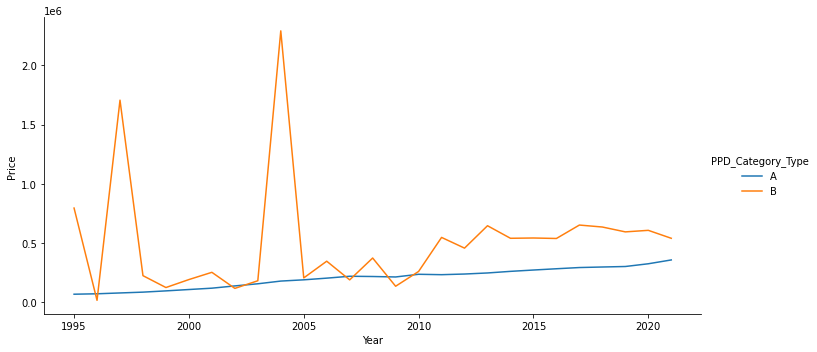

In [ ]:
# plot lines showing the change of Prices in years over different duration
sns.relplot(kind='line', data=pct, x='Year', y='Price', hue='PPD_Category_Type', aspect=2);

In [ ]:
house_data.head()

,Price,Date_of_Transfer,Postcode,Property_Type,Old_New,Duration,PAON,Town_City,District,County,PPD_Category_Type,Record_Status_monthly_file,Year,Month,Day
0,18500,1995-01-31,TQ1 1RY,F,N,L,VILLA PARADISO,TORQUAY,TORBAY,TORBAY,A,A,1995,1,31
1,73450,1995-10-09,L26 7XJ,D,Y,F,6,LIVERPOOL,KNOWSLEY,MERSEYSIDE,A,A,1995,10,9
2,59000,1995-03-31,BH12 2AE,D,N,F,28,POOLE,POOLE,POOLE,A,A,1995,3,31
3,31000,1995-12-04,IP13 0DR,D,Y,F,NONSUCH COTTAGE,WOODBRIDGE,SUFFOLK COASTAL,SUFFOLK,A,A,1995,12,4
4,95000,1995-09-22,WS14 0BE,D,N,F,FOX COVER COTTAGE,LICHFIELD,LICHFIELD,STAFFORDSHIRE,A,A,1995,9,22


In the main data it was seen there were lots of redundancy in PAON and SAON combinations for a locality, so we can consider for removing it

## Modelling

In [ ]:
house_data.columns

Index(['Transaction_unique_identifier', 'Price', 'Date_of_Transfer',
       'Postcode', 'Property_Type', 'Old_New', 'Duration', 'PAON', 'Town_City',
       'District', 'County', 'PPD_Category_Type', 'Record_Status_monthly_file',
       'Year', 'Month', 'Day'],
      dtype='object')

In [ ]:
data = house_data
data['Property_Type']=data['Property_Type'].factorize()[0].astype('float32')
data['Old_New']=data['Old_New'].factorize()[0].astype('float32')
data['Duration']=data['Duration'].factorize()[0].astype('float32')
data['Town_City']=data['Town_City'].factorize()[0].astype('float32')
data['District']=data['District'].factorize()[0].astype('float32')
data['County']=data['County'].factorize()[0].astype('float32')
data['PPD_Category_Type']=data['PPD_Category_Type'].factorize()[0].astype('float32')
data['Record_Status_monthly_file']=data['Record_Status_monthly_file'].factorize()[0].astype('float32')
data['Price'] = data['Price'].astype('float32')

In [ ]:
data.shape

(26610295, 16)

In [ ]:
# I divide the data into "test" and "train".
tempX = data[['Property_Type', 'Old_New', 'Duration', 'Town_City', 'District', 'County', 'PPD_Category_Type', 'Day', 'Month', 'Year']]
tempY = data[['Price']]

In [ ]:
tempX = (tempX- tempX.mean())/tempX.std()

In [ ]:
# Normalize
tempX = (tempX - tempX.min())/(tempX.max() - tempX.min())

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test  = train_test_split(tempX, tempY, train_size=0.8)

In [ ]:
x_train.shape

(21288236, 10)

In [ ]:
from sklearn.linear_model import LinearRegression
# Linear regression on the GPU.
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Predict
pred = pd.DataFrame()
temp =lr.predict(x_test)

In [ ]:
pred["Pred"] = temp[:, 0]
pred["Pred"] = pred["Pred"].astype('float64')
pred

,Pred
0,74762.665002
1,196972.601406
2,73804.728580
3,135601.185224
4,658900.194726
...,...
5322054,234504.134954
5322055,173859.065845
5322056,114840.910541
5322057,656022.610276


In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred)

689618951931.776

In [ ]:
mean_squared_error(y_test, pred, squared=False)

830432.9906330649

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.01888570026782177

# DNN

In [ ]:
from tensorflow.keras.models import Sequential,load_model

from tensorflow.keras.layers import Conv2D

from tensorflow.keras.layers import MaxPool2D

from tensorflow.keras.layers import Flatten, Activation

from tensorflow.keras.layers import Dropout

from tensorflow.keras.layers import Dense

from keras.utils.vis_utils import plot_model

from keras.utils.np_utils import to_categorical

from keras.callbacks import ModelCheckpoint

from tensorflow.keras import metrics

import matplotlib.pyplot as plt

import time

from numpy.random import seed

import graphviz

import tensorflow as tf

In [ ]:
checkpoint = ModelCheckpoint('weights.hdf5',monitor='val_loss',save_best_only=True) 

In [ ]:
# Create the model: model

model = Sequential()



# Add the first hidden layer

model.add(Dense(1000,activation='relu',input_shape =(10,)))



# Add the second hidden layer

model.add(Dense(800,activation='relu'))



model.add(Dense(1000,activation='relu'))



model.add(Dense(800,activation='relu'))

model.add(Dropout(0.10))



model.add(Dense(1000,activation='relu'))

model.add(Dropout(0.10))



# Add the output layer

model.add(Dense(1,activation='relu'))



# Compile the model

model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy', tf.keras.metrics.CosineSimilarity(axis=1)])

model.summary()



# Fit the model

history2 = model.fit(x_train,y_train,validation_split=0.2,epochs = 10,batch_size= 50000, callbacks = [checkpoint])

model.evaluate(x_test,y_test)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 1000)              11000     
                                                                 
 dense_32 (Dense)            (None, 800)               800800    
                                                                 
 dense_33 (Dense)            (None, 1000)              801000    
                                                                 
 dense_34 (Dense)            (None, 800)               800800    
                                                                 
 dropout_11 (Dropout)        (None, 800)               0         
                                                                 
 dense_35 (Dense)            (None, 1000)              801000    
                                                                 
 dropout_12 (Dropout)        (None, 1000)             

[574568660992.0, 3.382149543540436e-06, 1.0]

In [ ]:
file_path = '/content/weights.hdf5'

In [ ]:
new_model = load_model(file_path)
new_model.fit(x_train,y_train,validation_split=0.2,epochs = 50,batch_size= 50000, callbacks = [checkpoint])


Epoch 1/50
341/341 [==============================] - 62s 174ms/step - loss: 559114682368.0000 - accuracy: 4.3451e-06 - cosine_similarity: 1.0000 - val_loss: 656973430784.0000 - val_accuracy: 3.5231e-06 - val_cosine_similarity: 1.0000
Epoch 2/50
341/341 [==============================] - 59s 172ms/step - loss: 558016364544.0000 - accuracy: 4.3451e-06 - cosine_similarity: 1.0000 - val_loss: 666724466688.0000 - val_accuracy: 3.5231e-06 - val_cosine_similarity: 1.0000
Epoch 3/50
341/341 [==============================] - 58s 171ms/step - loss: 556631326720.0000 - accuracy: 4.3451e-06 - cosine_similarity: 1.0000 - val_loss: 657454071808.0000 - val_accuracy: 3.5231e-06 - val_cosine_similarity: 1.0000
Epoch 4/50
341/341 [==============================] - 59s 172ms/step - loss: 556844777472.0000 - accuracy: 4.3451e-06 - cosine_similarity: 1.0000 - val_loss: 654226358272.0000 - val_accuracy: 3.5231e-06 - val_cosine_similarity: 1.0000
Epoch 5/50
341/341 [==============================] - 59s 17